In [ ]:
import sys
!{sys.executable} -m pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
!pip install --upgrade transformers

In [ ]:
import transformers
print(transformers.__version__)
print(transformers.__file__)


4.51.3
/usr/local/lib/python3.11/dist-packages/transformers/__init__.py


In [ ]:
from transformers import TrainingArguments

print(TrainingArguments.__module__)  # Confirm it's from transformers.training_args


transformers.training_args


In [ ]:
from transformers import TrainingArguments
import inspect

# Show signature of the __init__ method
print(inspect.signature(TrainingArguments.__init__))


(self, output_dir: Optional[str] = None, overwrite_output_dir: bool = False, do_train: bool = False, do_eval: bool = False, do_predict: bool = False, eval_strategy: Union[transformers.trainer_utils.IntervalStrategy, str] = 'no', prediction_loss_only: bool = False, per_device_train_batch_size: int = 8, per_device_eval_batch_size: int = 8, per_gpu_train_batch_size: Optional[int] = None, per_gpu_eval_batch_size: Optional[int] = None, gradient_accumulation_steps: int = 1, eval_accumulation_steps: Optional[int] = None, eval_delay: Optional[float] = 0, torch_empty_cache_steps: Optional[int] = None, learning_rate: float = 5e-05, weight_decay: float = 0.0, adam_beta1: float = 0.9, adam_beta2: float = 0.999, adam_epsilon: float = 1e-08, max_grad_norm: float = 1.0, num_train_epochs: float = 3.0, max_steps: int = -1, lr_scheduler_type: Union[transformers.trainer_utils.SchedulerType, str] = 'linear', lr_scheduler_kwargs: Union[dict, str, NoneType] = <factory>, warmup_ratio: float = 0.0, warmup_ste

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
from datasets import load_dataset

dataset = load_dataset("casehold/casehold")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


casehold.py:   0%|          | 0.00/8.68k [00:00<?, ?B/s]

The repository for casehold/casehold contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/casehold/casehold.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


train.csv:   0%|          | 0.00/85.3M [00:00<?, ?B/s]

val.csv:   0%|          | 0.00/10.4M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
# Access each split
train_data = dataset["train"].select(range(3000))
val_data = dataset["validation"].select(range(500))
test_data = dataset["test"].select(range(500))

In [ ]:
print(f'Train size: {len(train_data)}')
print(f'Validation size: {len(val_data)}')
print(f'Test size: {len(test_data)}')

Train size: 3000
Validation size: 500
Test size: 500


In [ ]:
import pandas as pd

df_train = pd.DataFrame(train_data)
df_val = pd.DataFrame(val_data)
df_test = pd.DataFrame(test_data)

df_train.drop(columns=['example_id'], inplace=True)
df_val.drop(columns=['example_id'], inplace=True)
df_test.drop(columns=['example_id'], inplace=True)

df_train['label'] = df_train['label'].astype(int)
df_val['label'] = df_val['label'].astype(int)
df_test['label'] = df_test['label'].astype(int)

print(df_train.head())

                                       citing_prompt  \
0  Drapeau’s cohorts, the cohort would be a “vict...   
1  Colameta used customer information that he too...   
2  property tax sale. In reviewing section 6323(b...   
3  They also rely on Oswego Laborers’ Local 214 P...   
4  did not affect the defendant’s guideline range...   

                                           holding_0  \
0  holding that possession of a pipe bomb is a cr...   
1  recognizing that even if a plaintiff claims ce...   
2  holding that where there is a conflict between...   
3  holding that plaintiff stated a  349 claim whe...   
4  holding that united states v booker 543 us 220...   

                                           holding_1  \
0  holding that bank robbery by force and violenc...   
1  holding that included among trade secrets empl...   
2  holding that specific statutory provisions tak...   
3  holding that plaintiff stated a claim for brea...   
4  holding that waiver of right to appeal sent

In [ ]:
columns = df_train.columns.tolist()
print(columns)

['citing_prompt', 'holding_0', 'holding_1', 'holding_2', 'holding_3', 'holding_4', 'label']


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset

model_name = "gpt2"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Make sure padding tokens are defined
tokenizer.pad_token = tokenizer.eos_token
model.resize_token_embeddings(len(tokenizer))

# Example dataset preparation for GPT-style input
def preprocess_gpt(example):
    input_prompt = example['prompt']
    choices = example['choices']
    label = example['label']

    # Concatenate prompt with each choice
    inputs = [f"{input_prompt} {c}" for c in choices]
    encoded = tokenizer(inputs, padding=True, truncation=True, return_tensors='pt')

    # Language modeling: We can treat the correct choice as the target output
    target = tokenizer(f"{input_prompt} {choices[label]}", return_tensors='pt')['input_ids']

    return {
        'input_ids': encoded['input_ids'],
        'attention_mask': encoded['attention_mask'],
        'labels': target
    }

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments

model_name = "t5-base"

tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Preprocess function
def preprocess_t5(example):
    prompt = example['prompt']
    choices = example['choices']
    label = example['label']

    input_text = f"question: {prompt} options: " + " ".join([f"({chr(65+i)}) {c}" for i, c in enumerate(choices)])
    target_text = chr(65 + label)  # Convert label to A-E

    input_enc = tokenizer(input_text, padding="max_length", truncation=True, max_length=512)
    target_enc = tokenizer(target_text, padding="max_length", truncation=True, max_length=5)

    return {
        "input_ids": input_enc["input_ids"],
        "attention_mask": input_enc["attention_mask"],
        "labels": target_enc["input_ids"],
    }

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import T5Tokenizer, T5ForConditionalGeneration, GPT2Tokenizer, GPT2LMHeadModel
from torch.optim import AdamW
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [ ]:
class CaseHoldDataset(Dataset):
    def __init__(self, df, tokenizer, model_type='t5', max_length=512):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.model_type = model_type
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.loc[idx]
        prompt = row['citing_prompt']
        choices = [row[f'holding_{i}'] for i in range(5)]
        label = row['label']

        if self.model_type == 't5':
            input_text = f"question: {prompt} options: " + " ".join([f"({chr(65+i)}) {c}" for i, c in enumerate(choices)])
            target_text = chr(65 + label)
            inputs = self.tokenizer(input_text, max_length=self.max_length, truncation=True, padding="max_length", return_tensors="pt")
            targets = self.tokenizer(target_text, max_length=2, padding="max_length", return_tensors="pt")
            return {
                "input_ids": inputs["input_ids"].squeeze(0),
                "attention_mask": inputs["attention_mask"].squeeze(0),
                "labels": targets["input_ids"].squeeze(0),
            }

        elif self.model_type == 'gpt2':
            inputs = [f"{prompt} {c}" for c in choices]
            tokenized = self.tokenizer(inputs, return_tensors='pt', padding='max_length',
                                      max_length=self.max_length, truncation=True)
            return {
                "input_ids": tokenized["input_ids"],          # shape: [5, seq_len]
                "attention_mask": tokenized["attention_mask"],# shape: [5, seq_len]
                "label": torch.tensor(label, dtype=torch.long)
            }

In [ ]:
def get_dataloaders(df_train, df_val, df_test, tokenizer, model_type, batch_size=8):
    train_ds = CaseHoldDataset(df_train, tokenizer, model_type)
    val_ds = CaseHoldDataset(df_val, tokenizer, model_type)
    test_ds = CaseHoldDataset(df_test, tokenizer, model_type)

    return (
        DataLoader(train_ds, batch_size=batch_size, shuffle=True),
        DataLoader(val_ds, batch_size=1),
        DataLoader(test_ds, batch_size=1)
    )

In [ ]:
def evaluate_t5(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=2)
            preds = [tokenizer.decode(p, skip_special_tokens=True).strip() for p in outputs]
            trues = [tokenizer.decode(l, skip_special_tokens=True).strip() for l in labels]

            pred_ids = [ord(p.upper()) - 65 for p in preds]
            true_ids = [ord(t.upper()) - 65 for t in trues]

            correct += sum([p == t for p, t in zip(pred_ids, true_ids)])
            total += len(labels)

    print(f"Eval Accuracy: {correct / total:.4f}")
    return correct / total

In [ ]:
import os

def train_t5(model, train_loader, eval_loader, epochs=3, lr=5e-5, model_path="best_t5_model.pt"):
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=lr)
    eval_accuracies = []
    train_losses = []
    best_acc = 0.0

    if os.path.exists(model_path):
        print(f"Loading model from {model_path}")
        model.load_state_dict(torch.load(model_path))

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in tqdm(train_loader):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total_loss += loss.item()

        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}")
        eval_acc = evaluate_t5(model, eval_loader)
        eval_accuracies.append(eval_acc)

        if eval_acc > best_acc:
            best_acc = eval_acc
            torch.save(model.state_dict(), model_path)
            print(f"Saved better model (Eval Accuracy: {eval_acc:.4f})")

    return eval_accuracies, train_losses

In [ ]:
t5_tokenizer = T5Tokenizer.from_pretrained("t5-base")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-base")

train_loader, eval_loader, test_loader = get_dataloaders(df_train, df_val, df_test, t5_tokenizer, "t5")

In [ ]:
eval_accuracies, train_losses = train_t5(t5_model, train_loader, eval_loader, epochs=10, lr=5e-5)

100%|██████████| 375/375 [06:23<00:00,  1.02s/it]


Epoch 1, Train Loss: 0.8014
Eval Accuracy: 0.7120
Saved better model (Eval Accuracy: 0.7120)


100%|██████████| 375/375 [06:25<00:00,  1.03s/it]


Epoch 2, Train Loss: 0.3988
Eval Accuracy: 0.7600
Saved better model (Eval Accuracy: 0.7600)


100%|██████████| 375/375 [06:26<00:00,  1.03s/it]


Epoch 3, Train Loss: 0.2662
Eval Accuracy: 0.7600


100%|██████████| 375/375 [06:25<00:00,  1.03s/it]


Epoch 4, Train Loss: 0.1806
Eval Accuracy: 0.7620
Saved better model (Eval Accuracy: 0.7620)


100%|██████████| 375/375 [06:25<00:00,  1.03s/it]


Epoch 5, Train Loss: 0.1109
Eval Accuracy: 0.7760
Saved better model (Eval Accuracy: 0.7760)


100%|██████████| 375/375 [06:26<00:00,  1.03s/it]


Epoch 6, Train Loss: 0.0813
Eval Accuracy: 0.7540


100%|██████████| 375/375 [06:25<00:00,  1.03s/it]


Epoch 7, Train Loss: 0.0696
Eval Accuracy: 0.7620


100%|██████████| 375/375 [06:25<00:00,  1.03s/it]


Epoch 8, Train Loss: 0.0508
Eval Accuracy: 0.7760


100%|██████████| 375/375 [06:25<00:00,  1.03s/it]


Epoch 9, Train Loss: 0.0341
Eval Accuracy: 0.7560


100%|██████████| 375/375 [06:25<00:00,  1.03s/it]


Epoch 10, Train Loss: 0.0374
Eval Accuracy: 0.7760


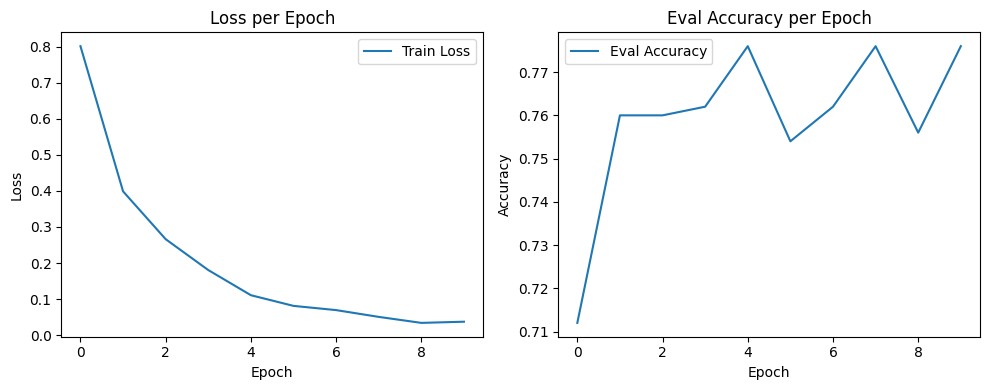

In [ ]:
# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(eval_accuracies, label="Eval Accuracy")
plt.title("Eval Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix
)

def evaluate_t5_testset(model, dataloader, tokenizer):
    model.eval()
    model.to(device)

    all_preds = []
    all_labels = []
    skipped = 0

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating T5 on Test Set"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Generate predictions
            outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=2)
            preds = [tokenizer.decode(p, skip_special_tokens=True).strip() for p in outputs]
            trues = [tokenizer.decode(l, skip_special_tokens=True).strip() for l in labels]

            for p, t in zip(preds, trues):
                try:
                    if p and t:
                        pred_id = ord(p.strip()[0].upper()) - 65
                        true_id = ord(t.strip()[0].upper()) - 65
                        if 0 <= pred_id <= 4 and 0 <= true_id <= 4:
                            all_preds.append(pred_id)
                            all_labels.append(true_id)
                        else:
                            skipped += 1
                    else:
                        skipped += 1
                except:
                    skipped += 1

    if not all_labels:
        print("No valid predictions.")
        return None

    # Metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    weighted_precision, weighted_recall, weighted_f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    print("\nFinal T5 Test Set Evaluation:")
    print(f"Accuracy:           {accuracy:.4f}")
    print(f"Macro Precision:    {precision:.4f}")
    print(f"Macro Recall:       {recall:.4f}")
    print(f"Macro F1-score:     {f1:.4f}")
    print(f"Weighted Precision: {weighted_precision:.4f}")
    print(f"Weighted Recall:    {weighted_recall:.4f}")
    print(f"Weighted F1-score:  {weighted_f1:.4f}")
    print(f"Skipped Samples:    {skipped}")
    print("\nClassification Report:\n", classification_report(all_labels, all_preds, digits=4))
    print("Confusion Matrix:\n", conf_matrix)

    return {
        "accuracy": accuracy,
        "macro_f1": f1,
        "weighted_f1": weighted_f1,
        "confusion_matrix": conf_matrix,
        "skipped": skipped
    }

In [ ]:
metrics = evaluate_t5_testset(model, test_loader, tokenizer)
metrics

Evaluating T5 on Test Set: 100%|██████████| 500/500 [00:29<00:00, 17.21it/s]


Final T5 Test Set Evaluation:
Accuracy:           0.1711
Macro Precision:    0.1399
Macro Recall:       0.1884
Macro F1-score:     0.1456
Weighted Precision: 0.1406
Weighted Recall:    0.1711
Weighted F1-score:  0.1405
Skipped Samples:    424

Classification Report:
               precision    recall  f1-score   support

           0     0.2143    0.1667    0.1875        18
           1     0.1667    0.1333    0.1481        15
           2     0.2188    0.5833    0.3182        12
           3     0.0000    0.0000    0.0000        14
           4     0.1000    0.0588    0.0741        17

    accuracy                         0.1711        76
   macro avg     0.1399    0.1884    0.1456        76
weighted avg     0.1406    0.1711    0.1405        76

Confusion Matrix:
 [[3 3 8 1 3]
 [4 2 5 3 1]
 [2 1 7 0 2]
 [3 2 6 0 3]
 [2 4 6 4 1]]


{'accuracy': 0.17105263157894737,
 'macro_f1': 0.14558080808080806,
 'weighted_f1': 0.14045609604820133,
 'confusion_matrix': array([[3, 3, 8, 1, 3],
        [4, 2, 5, 3, 1],
        [2, 1, 7, 0, 2],
        [3, 2, 6, 0, 3],
        [2, 4, 6, 4, 1]]),
 'skipped': 424}